In [51]:
import pandas as pd
import numpy as np
import os
from facenet_pytorch import InceptionResnetV1
from PIL import Image
from torchvision import transforms
from tqdm import tqdm

In [4]:
data = pd.read_csv('ffhq600.csv')
data

,Unnamed: 0,"positive는 1, negative는 -1, pass는 0으로 투표해주세요 user1 -> 이윤성 이런식으로 이름 바꿔서 진행해주세요 그룹화된거 플러스 버튼 누르면 보입니다!",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,>3 or <-3,3.00%,0.00%,0.00%,26.63%,29.48%,0.00%,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,>2 or <-2,7.00%,0.00%,0.00%,49.25%,58.96%,0.00%,0.00%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,>3,0,0,0,66,137,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,>2,1,0,0,155,276,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,<-2,6,0,0,139,76,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,<-3,3,0,0,93,39,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,total,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,user6,NaN,NaN,NaN,NaN,NaN,NaN
8,파일명,번호,사진,매력,신뢰도,이성적,외향적,선함,모험적인,고집있는,...,모험적인,고집있는,NaN,매력,신뢰도,이성적,외향적,안전한,모험적인,고집있는
9,00011.png,1,NaN,0,1,1,4,4,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dict_for_pd = {'image_name':[],  
               'extrovert': [], 
               'good': []}

for index, row in data.iterrows():
    image_name = row['Unnamed: 0']
    if type(image_name) == type(np.nan):
        continue
    dict_for_pd['image_name'].append(image_name)
    dict_for_pd['extrovert'].append(row['Unnamed: 6'])
    dict_for_pd['good'].append(row['Unnamed: 7'])


In [24]:
refine_pd = pd.DataFrame.from_dict(dict_for_pd, index='image_name')
refine_pd

TypeError: from_dict() got an unexpected keyword argument 'index'

In [23]:
refine_pd[refine_pd['image_name'] == '00011.png']

,image_name,extrovert,good
1,00011.png,4,4


In [33]:
type(refine_pd[refine_pd['image_name'] == '00011.png']['good'].iloc[0])

str

In [42]:
image_names = os.listdir('selectedffhq600')
image_names[0]

'06782.png'

In [43]:
len(image_names)

597

In [196]:
def concat_images(sort_ret, top_k=4, image_size=160):
    dst = Image.new('RGB', (image_size*top_k, image_size))

    for i in range(1, 5):
        img = Image.open(os.path.join('selectedffhq600', image_name_list[sort_ret[i]]))
        img = img.resize((160, 160))
        dst.paste(img, (img.width*(i-1), 0))
    
    return dst

In [41]:
resnet = InceptionResnetV1(pretrained='vggface2').eval()
print(resnet)

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [1]:
features = {}
for each_img_name in tqdm(image_names):
    img = Image.open(os.path.join('selectedffhq600', each_img_name))
    img = transforms.ToTensor()(img)
    img_embedding = resnet(img.unsqueeze(0))
    # print("img_embedding : {}".format(img_embedding.shape))
    features[each_img_name] = img_embedding.squeeze(0).data.numpy()

NameError: name 'tqdm' is not defined

In [57]:
features.keys()

dict_keys(['06782.png', '20779.png', '20792.png', '20962.png', '20590.png', '05076.png', '06219.png', '20341.png', '17506.png', '20625.png', '20157.png', '19926.png', '05472.png', '20802.png', '05467.png', '01167.png', '18344.png', '20803.png', '19933.png', '17507.png', '18185.png', '20432.png', '14783.png', '20426.png', '12537.png', '14620.png', '20585.png', '20591.png', '20963.png', '19890.png', '02254.png', '19847.png', '19853.png', '11599.png', '20022.png', '03823.png', '20020.png', '01978.png', '20008.png', '20785.png', '20791.png', '02518.png', '19892.png', '06597.png', '00680.png', '20578.png', '20587.png', '20593.png', '03410.png', '20424.png', '00045.png', '06187.png', '19925.png', '20815.png', '17713.png', '08168.png', '19930.png', '20155.png', '20592.png', '20586.png', '00871.png', '20579.png', '19887.png', '05276.png', '20784.png', '20009.png', '10858.png', '20743.png', '20964.png', '20780.png', '13809.png', '00691.png', '20582.png', '14633.png', '09716.png', '20637.png', '

In [54]:
import pickle

with open('ffhq600_facenet_vggface2.pkl', 'wb') as fp:
    pickle.dump(features, fp)
    print("pkl file dump done")

pkl file dump done


In [56]:
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
image_name_list = []
feature_list = []
for each_key in features:
    image_name_list.append(each_key)
    feature_list.append(features[each_key])
print(len(image_name_list))

597


In [59]:
image_name_list[0]

'06782.png'

In [ ]:
feature_np = np.array(feature_list)
feature_np.shape

In [238]:
query_index = 12

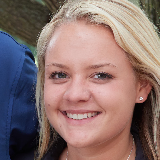

In [239]:
query_img = Image.open(os.path.join('selectedffhq600', image_name_list[query_index]))
query_img = query_img.resize((160, 160))
query_img

In [240]:
query_feature = np.expand_dims(feature_np[query_index], 0)
query_feature.shape

(1, 512)

In [241]:
ret = cosine_similarity(query_feature, feature_np)
ret.shape

(1, 597)

In [242]:
ret = np.squeeze(ret, 0)
ret.shape

(597,)

In [243]:
sort_ret = np.argsort(ret)[::-1]
sort_ret

array([ 12, 439,  32, 306, 324,  33, 466,  29, 271,  28, 403, 267, 575,
       409, 309,  86, 415,  21, 121, 283, 517, 449, 113, 361, 527, 319,
       380, 513, 418, 211, 244, 126, 291, 179, 191, 485, 326, 558, 474,
       498, 363, 518, 332, 128, 272, 176, 579, 589, 135, 111, 239, 230,
       503, 337, 315, 577, 249, 243, 471, 489, 333, 500, 411, 331,  76,
       542,  58, 557,  38, 550, 275, 114,  83, 227, 376, 544,   0, 582,
       233, 504, 242,  55, 546, 468, 295, 147,  72, 303, 523, 563, 496,
        15, 382, 459, 190,  30,  56,  84, 423, 119, 254, 218, 375, 487,
       414,   6, 181,  16, 287,  23, 245, 280, 264, 529, 402, 372, 499,
       588,  63, 136, 279, 435, 137, 341, 428, 263, 541, 355, 209, 258,
       162,  35,  10,  79, 566, 189, 215, 316, 410, 247, 511, 164,  98,
       486, 251, 314, 210,   5, 519,   4,  92, 491, 284, 438, 107, 327,
       387, 349, 343, 365, 169, 366, 481, 256, 125, 347, 512,  75, 172,
       510, 440, 388, 506,  24,  22, 214, 559,  93, 538, 143,  8

In [244]:
image_name_list[sort_ret[1]]

'16448.png'

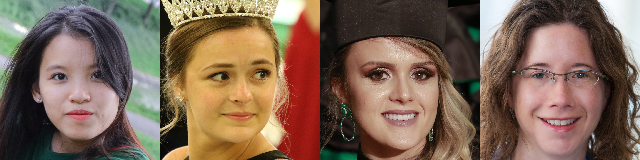

In [245]:
dst = concat_images(sort_ret)
dst